In [1]:
#import the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read the data from the local text file downloaded from Kaggle
xyz = pd.read_csv("C:/Users/Caroline Sanjana/Desktop/Final thesis/XYZ_LendingCorp.txt", sep='\t')
xyz.info()

c:\users\caroline sanjana\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (17,45,53) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  float64
 3   funded_amnt                  855969 non-null  float64
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

In [3]:
#view the fisrt 5 rows in the dataset
xyz.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
#the total number of rows and columns in the data
xyz.shape

(855969, 73)

In [5]:
# look for null values in the data
xyz.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
total_rev_hi_lim     67313
inq_fi              842681
total_cu_tl         842681
inq_last_12m        842681
default_ind              0
Length: 73, dtype: int64

# Data Visualization

In [6]:
#1.Visuliaze the loan amounts in the datset and identify pattern of loans issued
#store the list of values of the loan amount, funded amount and investor fundsin a dict 

loan_amount = xyz["loan_amnt"].values
funded_amount = xyz["funded_amnt"].values
investor_funded_amount = xyz["funded_amnt_inv"].values

c:\users\caroline sanjana\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\caroline sanjana\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\caroline sanjana\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Plea

Text(0.5, 1.0, 'Funded Amount by the Investors')

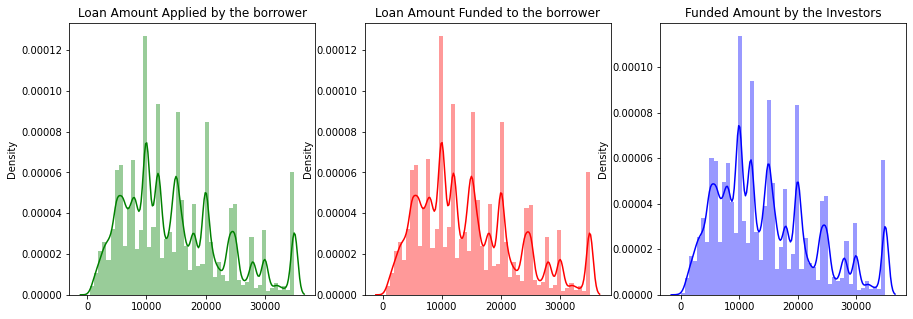

In [7]:
#create subplots to understand the distribution of amonuts 
fig, ax = plt.subplots(1, 3, figsize=(15,5))

#loan amount applied by borrower
sns.distplot(loan_amount, ax=ax[0], color="g")
ax[0].set_title("Loan Amount Applied by the borrower")

#loan amount funded to the borrower from lender
sns.distplot(funded_amount, ax=ax[1], color='r')
ax[1].set_title("Loan Amount Funded to the borrower")

#funded amount by the investors 
sns.distplot(investor_funded_amount, ax=ax[2], color='b')
ax[2].set_title("Funded Amount by the Investors") 

#From the plots it can observed that the loan amounts range between 10000 and 20000.
#There are obvious peaks.

c:\users\caroline sanjana\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x360 with 0 Axes>

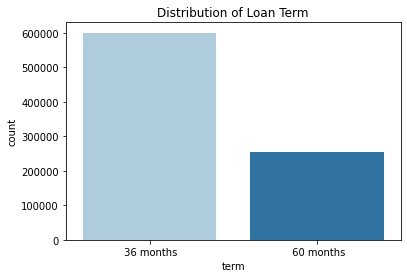

<Figure size 1080x360 with 0 Axes>

In [8]:
#distribution of loan term 
#convert the object to value counts
sns.countplot('term', data=xyz, palette="Paired").set(title='Distribution of Loan Term')
plt.figure(figsize=(15,5))
#from the graph we can observe that the loan terms with 36 months are higher than 60 months.

<Figure size 1080x360 with 0 Axes>

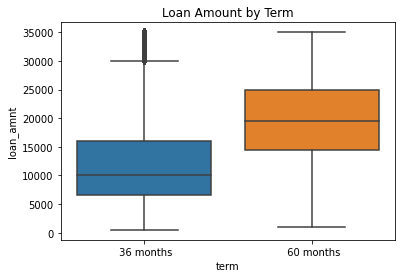

<Figure size 1080x360 with 0 Axes>

In [9]:
#loan amount by term
sns.boxplot(x=xyz.term, y=xyz.loan_amnt).set_title('Loan Amount by Term')
plt.figure(figsize=(15,5))
#from the graph we can observe that the loan amount taken for a longer term period is higher.

c:\users\caroline sanjana\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\caroline sanjana\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Number of Installments')

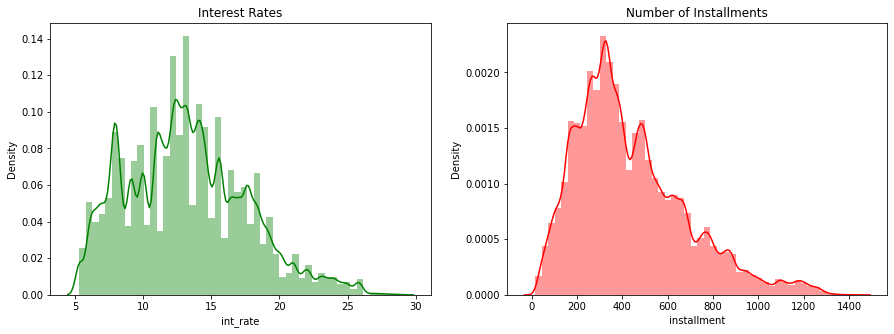

In [10]:
#distribution of interest rates and installments 
#create subplots to understand the distribution of amonuts 
fig, ax = plt.subplots(1, 2, figsize=(15,5))

#number of installments in the loan term
sns.distplot(xyz['int_rate'], ax=ax[0], color="g")
ax[0].set_title("Interest Rates")

#loan amount funded to the borrower from lender
sns.distplot(xyz['installment'], ax=ax[1], color='r')
ax[1].set_title("Number of Installments")

#from the graph it can be observed that the interest rates were mostly between 10 and 15 percent
# the highest number of insatllmets were 300.
# also the loan term period is correlated with the number of installlments the longer the loan term the lesser the number of installemnts 

c:\users\caroline sanjana\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x360 with 0 Axes>

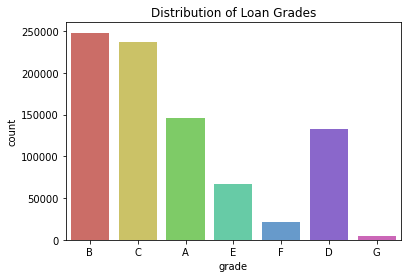

<Figure size 1080x360 with 0 Axes>

In [11]:
#vislaize the grades of the loan that range from A to G
sns.countplot('grade', data=xyz, palette='hls').set(title='Distribution of Loan Grades')
plt.figure(figsize=(15,5))
#from the graph it is observed that the number of B grade loans were funded the highest

Text(0.5, 1.0, 'Verfication status of the loan amounts')

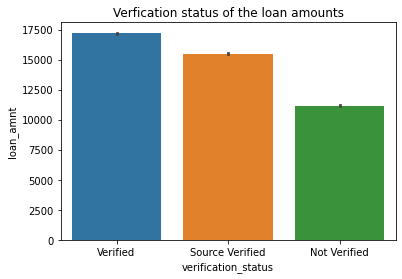

In [12]:
#verfication status of the loan applied 
sns.barplot(x="verification_status", y="loan_amnt", data=xyz)
plt.title("Verfication status of the loan amounts")
#from the graph it can be observed that most loan amounts upto 17400 were completely verified.

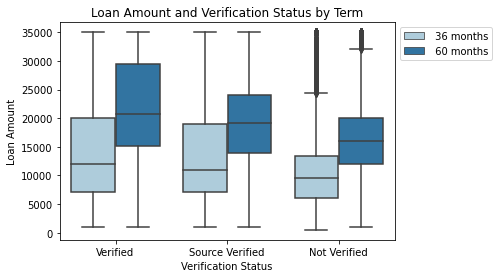

In [13]:
#the loan amount by the verification status with the term period
sns.boxplot(x=xyz.verification_status, y=xyz.loan_amnt, hue=xyz.term, palette="Paired").set_title('Loan Amount and Verification Status by Term')
plt.xlabel("Verification Status")
plt.ylabel("Loan Amount")
plt.legend(bbox_to_anchor=(1, 1), loc=2)

In [14]:
#Visualize which year was issued the most loans
#take the issue date column and convert the dates to a year format
xyz['issue_d'].head()

0    Dec-2011
1    Dec-2011
2    Dec-2011
3    Dec-2011
4    Dec-2011
Name: issue_d, dtype: object

In [15]:
issue_year = pd.to_datetime(xyz['issue_d'])
xyz['issue_year'] = issue_year.dt.year

Text(0.5, 1.0, 'Loans Issued by Year')

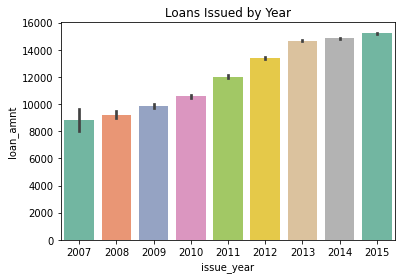

In [16]:
#plot a barchart to see the loans issued by every year
sns.barplot(x='issue_year', y='loan_amnt', data=xyz, palette='Set2')
plt.title("Loans Issued by Year")
#from the graph we can observe that the most loans were issued in the year 2015.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'car'),
  Text(2, 0, 'small_business'),
  Text(3, 0, 'other'),
  Text(4, 0, 'wedding'),
  Text(5, 0, 'debt_consolidation'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'major_purchase'),
  Text(8, 0, 'medical'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

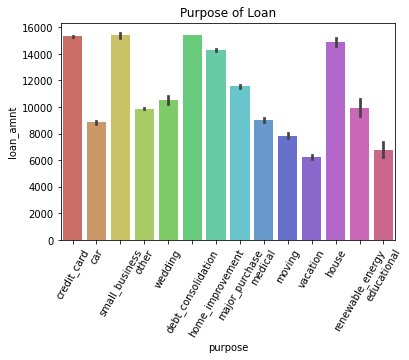

In [17]:
#plot the purpose of the loan being applied by the borrower

sns.barplot(x='purpose', y='loan_amnt', data=xyz, palette='hls')
plt.title("Purpose of Loan")
plt.xticks(rotation=60)

c:\users\caroline sanjana\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Default Indicator')

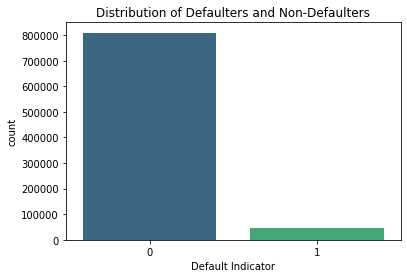

In [18]:
#the target varible is the deafult indicator that are of two classes 0 and 1
# 0: Non-Defaulter, 1: Defaulter 

sns.countplot('default_ind', data=xyz, palette="viridis").set(title='Distribution of Defaulters and Non-Defaulters')
plt.xlabel("Default Indicator")

#it is observed that there are more number of non-defaulters than the defaulters

Text(0, 0.5, 'Loan_Amount')

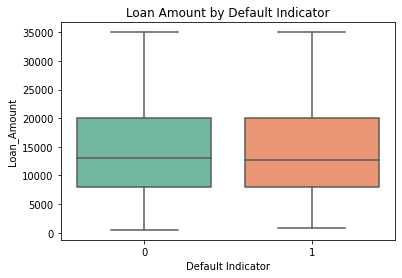

In [19]:
#loan amount by default indicator

sns.boxplot(x=xyz.default_ind, y=xyz.loan_amnt, palette="Set2").set_title('Loan Amount by Default Indicator')
plt.xlabel("Default Indicator")
plt.ylabel("Loan_Amount")
#from the graph it can be observed that there are equal defaulters and non-defaulters upto

Text(0.5, 1.0, 'Default Indicator by Income')

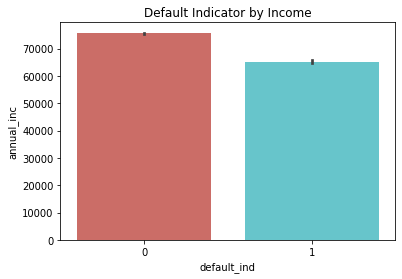

In [20]:
#default indicator by annual income
sns.barplot(x='default_ind', y='annual_inc', data=xyz, palette='hls')
plt.title("Default Indicator by Income")
#the bar graph shows that the annual income does not have a great impact on defaulting the loan

# Data Cleaning

In [21]:
#Data Cleaning 
xyz.shape

(855969, 74)

In [22]:
#checking for duplicate values
xyz.duplicated().sum()

#there are no duplicate values in the data.

0

In [23]:
#checking for null values
xyz.isnull().sum()

id                      0
member_id               0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
                    ...  
inq_fi             842681
total_cu_tl        842681
inq_last_12m       842681
default_ind             0
issue_year              0
Length: 74, dtype: int64

In [24]:
#to find out which varibales in the dataset has missing values more that 75%

missing_val = xyz.isnull().sum()/len(xyz)
missing_var = missing_val[missing_val > 0.75]
missing_var

desc                           0.857691
mths_since_last_record         0.846742
mths_since_last_major_derog    0.750997
annual_inc_joint               0.999484
dti_joint                      0.999486
verification_status_joint      0.999484
open_acc_6m                    0.984476
open_il_6m                     0.984476
open_il_12m                    0.984476
open_il_24m                    0.984476
mths_since_rcnt_il             0.984890
total_bal_il                   0.984476
il_util                        0.986438
open_rv_12m                    0.984476
open_rv_24m                    0.984476
max_bal_bc                     0.984476
all_util                       0.984476
inq_fi                         0.984476
total_cu_tl                    0.984476
inq_last_12m                   0.984476
dtype: float64

In [25]:
#we can drop all the columns with 75% of missing values as these values will not contibute 
missing_var = missing_val[missing_val > 0.75].index
missing_var

Index(['desc', 'mths_since_last_record', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m'],
      dtype='object')

In [26]:
xyz.drop(missing_var, axis=1, inplace=True)

In [27]:
xyz.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,issue_year
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,2011
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1,2011
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,2011
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,2011
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,2011


In [28]:
#drop the columns that are not important in the analysis

xyz.drop(['id','member_id','sub_grade','emp_title','title','last_pymnt_d','next_pymnt_d',
        'last_credit_pull_d','addr_state','earliest_cr_line','zip_code',
        'mths_since_last_delinq','policy_code','acc_now_delinq','issue_year'], axis=1, inplace=True)

In [29]:
xyz.shape

(855969, 39)

In [30]:
#again checking for null values
xyz.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
emp_length                    43061
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
pymnt_plan                        0
purpose                           0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                      446
total_acc                         0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp             

In [31]:
#the columns that have missing values are lesser and not too much so we can take the mean for the features
#not all entries in the columns or numerical and have some charaters that needs to be removed
xyz['emp_length']

0         10+ years
1          < 1 year
2         10+ years
3         10+ years
4            1 year
            ...    
855964      8 years
855965    10+ years
855966      5 years
855967       1 year
855968    10+ years
Name: emp_length, Length: 855969, dtype: object

In [32]:
#remove the characters from every entry such as +, < and year or years
#replace the characters
xyz["emp_length"] = xyz['emp_length'].replace({'years':'','year':'',',':'',
                                              '<':'','\+':'','n/a':'0','s':''},regex = True)

#regex is used to identify any dash (-) after a number

In [33]:
xyz['emp_length'].head()

0    10 
1     1 
2    10 
3    10 
4     1 
Name: emp_length, dtype: object

In [34]:
#convert the datatype to numeric, coerce is used to used to replace any invalid parsing to an NaN value
xyz['emp_length'] = pd.to_numeric(xyz['emp_length'], errors = 'coerce')

In [35]:
#Replace the missing nan values and its entries with the mean
xyz['emp_length'].fillna(xyz['emp_length'].mean(), inplace=True)
xyz['revol_util'].fillna(xyz['revol_util'].mean(), inplace=True)
xyz['collections_12_mths_ex_med'].fillna(xyz['collections_12_mths_ex_med'].mean(), inplace=True)
xyz['tot_coll_amt'].fillna(xyz['tot_coll_amt'].mean(), inplace=True)
xyz['tot_cur_bal'].fillna(xyz['tot_cur_bal'].mean(), inplace=True)
xyz['total_rev_hi_lim'].fillna(xyz['total_rev_hi_lim'].mean(), inplace=True)

In [36]:
xyz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   855969 non-null  float64
 1   funded_amnt                 855969 non-null  float64
 2   funded_amnt_inv             855969 non-null  float64
 3   term                        855969 non-null  object 
 4   int_rate                    855969 non-null  float64
 5   installment                 855969 non-null  float64
 6   grade                       855969 non-null  object 
 7   emp_length                  855969 non-null  float64
 8   home_ownership              855969 non-null  object 
 9   annual_inc                  855969 non-null  float64
 10  verification_status         855969 non-null  object 
 11  issue_d                     855969 non-null  object 
 12  pymnt_plan                  855969 non-null  object 
 13  purpose       

# Label Encoding

In [37]:
#Now that some cleaning has been done, start labelling the object datatype columns
#the method is called label encoding
#import the label encoder

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [38]:
#the columns such as grade, pymnt plan and application type are in the form of labels 
#convert the categorical values to numeric type - label encoding

xyz['grade'] = label_encoder.fit_transform(xyz['grade'])

In [39]:
#to find the labels in the varaible
xyz['grade'].unique()

#thus there are 7 labels of grades in the varaible 

array([1, 2, 0, 4, 5, 3, 6])

In [40]:
#payment plan variable has two possible outcomes y or n
xyz['pymnt_plan'] = label_encoder.fit_transform(xyz['pymnt_plan'])
xyz['pymnt_plan'].unique()

array([0, 1])

In [41]:
#application type has two possible entries if its an individual or joint appliocation
xyz['application_type'] = label_encoder.fit_transform(xyz['application_type'])

In [42]:
#the initial list status possible entries are W or F
xyz['initial_list_status'] = label_encoder.fit_transform(xyz['initial_list_status'])

In [43]:
xyz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   855969 non-null  float64
 1   funded_amnt                 855969 non-null  float64
 2   funded_amnt_inv             855969 non-null  float64
 3   term                        855969 non-null  object 
 4   int_rate                    855969 non-null  float64
 5   installment                 855969 non-null  float64
 6   grade                       855969 non-null  int32  
 7   emp_length                  855969 non-null  float64
 8   home_ownership              855969 non-null  object 
 9   annual_inc                  855969 non-null  float64
 10  verification_status         855969 non-null  object 
 11  issue_d                     855969 non-null  object 
 12  pymnt_plan                  855969 non-null  int32  
 13  purpose       

In [44]:
#next step is to convert more object datatypes to numerical form
xyz['term'].head()

0     36 months
1     60 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

In [45]:
#remove the charaters such as months and convert the datatype to numeric 
xyz['term'] = xyz['term'].replace({'months':'', ' ':''}, regex = True)
xyz['term'].head()

0    36
1    60
2    36
3    36
4    60
Name: term, dtype: object

In [46]:
xyz['term'] = label_encoder.fit_transform(xyz['term'])
xyz['term']

0         0
1         1
2         0
3         0
4         1
         ..
855964    0
855965    0
855966    1
855967    1
855968    0
Name: term, Length: 855969, dtype: int32

In [47]:
xyz['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [48]:
xyz['home_ownership'] = label_encoder.fit_transform(xyz['home_ownership'])
xyz['home_ownership']

0         5
1         5
2         5
3         5
4         5
         ..
855964    5
855965    1
855966    5
855967    5
855968    5
Name: home_ownership, Length: 855969, dtype: int32

In [49]:
xyz['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [50]:
xyz['verification_status'] = label_encoder.fit_transform(xyz['verification_status'])
xyz['verification_status'].unique()

array([2, 1, 0])

In [51]:
xyz['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [52]:
xyz['purpose'] = label_encoder.fit_transform(xyz['purpose'])
xyz['purpose'].head()

0     1
1     0
2    11
3     9
4     9
Name: purpose, dtype: int32

In [53]:
xyz.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,5000.0,5000.0,4975.0,0,10.65,162.87,1,10.0,5,24000.0,...,0.00,0.00,0.00,171.62,0.0,0,225.412882,139766.247529,32163.574526,0
1,2500.0,2500.0,2500.0,1,15.27,59.83,2,1.0,5,30000.0,...,0.00,117.08,1.11,119.66,0.0,0,225.412882,139766.247529,32163.574526,1
2,2400.0,2400.0,2400.0,0,15.96,84.33,2,10.0,5,12252.0,...,0.00,0.00,0.00,649.91,0.0,0,225.412882,139766.247529,32163.574526,0
3,10000.0,10000.0,10000.0,0,13.49,339.31,2,10.0,5,49200.0,...,16.97,0.00,0.00,357.48,0.0,0,225.412882,139766.247529,32163.574526,0
4,3000.0,3000.0,3000.0,1,12.69,67.79,1,1.0,5,80000.0,...,0.00,0.00,0.00,67.79,0.0,0,225.412882,139766.247529,32163.574526,0


In [54]:
xyz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   855969 non-null  float64
 1   funded_amnt                 855969 non-null  float64
 2   funded_amnt_inv             855969 non-null  float64
 3   term                        855969 non-null  int32  
 4   int_rate                    855969 non-null  float64
 5   installment                 855969 non-null  float64
 6   grade                       855969 non-null  int32  
 7   emp_length                  855969 non-null  float64
 8   home_ownership              855969 non-null  int32  
 9   annual_inc                  855969 non-null  float64
 10  verification_status         855969 non-null  int32  
 11  issue_d                     855969 non-null  object 
 12  pymnt_plan                  855969 non-null  int32  
 13  purpose       

In [55]:
#the issue date still an object we will split the string

xyz['issue_d'].head()

0    Dec-2011
1    Dec-2011
2    Dec-2011
3    Dec-2011
4    Dec-2011
Name: issue_d, dtype: object

In [56]:
#split the string 
xyz['str_split'] = xyz.issue_d.str.split('-')
xyz['str_split']

0         [Dec, 2011]
1         [Dec, 2011]
2         [Dec, 2011]
3         [Dec, 2011]
4         [Dec, 2011]
             ...     
855964    [Jan, 2015]
855965    [Jan, 2015]
855966    [Jan, 2015]
855967    [Jan, 2015]
855968    [Jan, 2015]
Name: str_split, Length: 855969, dtype: object

In [57]:
#create an issue and date column
xyz['issue'] = xyz.str_split.str.get(0)
xyz['issue']

0         Dec
1         Dec
2         Dec
3         Dec
4         Dec
         ... 
855964    Jan
855965    Jan
855966    Jan
855967    Jan
855968    Jan
Name: issue, Length: 855969, dtype: object

In [58]:
xyz['date'] = xyz.str_split.str.get(1)
xyz['date']

0         2011
1         2011
2         2011
3         2011
4         2011
          ... 
855964    2015
855965    2015
855966    2015
855967    2015
855968    2015
Name: date, Length: 855969, dtype: object

In [59]:
#now that the year and month are split, replace the year with numeric values 

xyz['issue'] = xyz['issue'].replace({'Jan':'01', 'Feb':'02', 'Mar':'03', 'Apr':'04', 
                                    'May':'05', 'Jun':'06', 'Jul':'07', 'Aug':'08', 
                                    'Sep':'09', 'Oct':'10', 'Nov':'11', 'Dec':'12'})

In [60]:
xyz['issue'].head()

0    12
1    12
2    12
3    12
4    12
Name: issue, dtype: object

In [61]:
# create a column issue_date and merge issue and date
xyz["issue_date"] = xyz["date"].map(str) + xyz["issue"]
xyz['issue_date']

#for example the Dec 2011 will be 201112

0         201112
1         201112
2         201112
3         201112
4         201112
           ...  
855964    201501
855965    201501
855966    201501
855967    201501
855968    201501
Name: issue_date, Length: 855969, dtype: object

In [62]:
xyz.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,collections_12_mths_ex_med,application_type,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,str_split,issue,date,issue_date
0,5000.0,5000.0,4975.0,0,10.65,162.87,1,10.0,5,24000.0,...,0.0,0,225.412882,139766.247529,32163.574526,0,"[Dec, 2011]",12,2011,201112
1,2500.0,2500.0,2500.0,1,15.27,59.83,2,1.0,5,30000.0,...,0.0,0,225.412882,139766.247529,32163.574526,1,"[Dec, 2011]",12,2011,201112
2,2400.0,2400.0,2400.0,0,15.96,84.33,2,10.0,5,12252.0,...,0.0,0,225.412882,139766.247529,32163.574526,0,"[Dec, 2011]",12,2011,201112
3,10000.0,10000.0,10000.0,0,13.49,339.31,2,10.0,5,49200.0,...,0.0,0,225.412882,139766.247529,32163.574526,0,"[Dec, 2011]",12,2011,201112
4,3000.0,3000.0,3000.0,1,12.69,67.79,1,1.0,5,80000.0,...,0.0,0,225.412882,139766.247529,32163.574526,0,"[Dec, 2011]",12,2011,201112


In [63]:
#sort the values

xyz = xyz.sort_values('issue_date')

In [64]:
#reset the index as the issue_date

xyz = xyz.set_index('issue_date')
xyz.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,last_pymnt_amnt,collections_12_mths_ex_med,application_type,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,str_split,issue,date
issue_date,,,,,,,,,,,,,,,,,,,,,
200706,7500.0,7500.0,800.0,0,13.75,255.43,4,1.0,4,22000.0,...,256.59,0.01423,0,225.412882,139766.247529,32163.574526,0,"[Jun, 2007]",06,2007
200707,5000.0,5000.0,4150.0,0,7.43,155.38,0,8.0,1,150000.0,...,4397.47,0.01423,0,225.412882,139766.247529,32163.574526,0,"[Jul, 2007]",07,2007
200707,5750.0,5750.0,3675.0,0,7.43,178.69,0,10.0,1,125000.0,...,4.74,0.01423,0,225.412882,139766.247529,32163.574526,0,"[Jul, 2007]",07,2007
200707,5000.0,5000.0,3975.0,0,7.43,155.38,0,6.0,5,40000.0,...,158.65,0.01423,0,225.412882,139766.247529,32163.574526,0,"[Jul, 2007]",07,2007
200707,1200.0,1200.0,0.0,0,11.54,39.60,2,1.0,5,20000.0,...,39.45,0.01423,0,225.412882,139766.247529,32163.574526,0,"[Jul, 2007]",07,2007


In [65]:
#now that the issue_date has been set as the index remove the object columns created and present in the data

xyz.drop(['issue_d', 'str_split', 'issue', 'date'], axis=1, inplace=True)

In [66]:
xyz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 855969 entries, 200706 to 201512
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   855969 non-null  float64
 1   funded_amnt                 855969 non-null  float64
 2   funded_amnt_inv             855969 non-null  float64
 3   term                        855969 non-null  int32  
 4   int_rate                    855969 non-null  float64
 5   installment                 855969 non-null  float64
 6   grade                       855969 non-null  int32  
 7   emp_length                  855969 non-null  float64
 8   home_ownership              855969 non-null  int32  
 9   annual_inc                  855969 non-null  float64
 10  verification_status         855969 non-null  int32  
 11  pymnt_plan                  855969 non-null  int32  
 12  purpose                     855969 non-null  int32  
 13  dti           

# Data Split

In [67]:
#split the data into train and test

xyz.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
issue_date,,,,,,,,,,,,,,,,,,,,,
200706,7500.0,7500.0,800.0,0,13.75,255.43,4,1.0,4,22000.0,...,0.0,0.0,0.0,256.59,0.01423,0,225.412882,139766.247529,32163.574526,0
200707,5000.0,5000.0,4150.0,0,7.43,155.38,0,8.0,1,150000.0,...,0.0,0.0,0.0,4397.47,0.01423,0,225.412882,139766.247529,32163.574526,0
200707,5750.0,5750.0,3675.0,0,7.43,178.69,0,10.0,1,125000.0,...,0.0,0.0,0.0,4.74,0.01423,0,225.412882,139766.247529,32163.574526,0
200707,5000.0,5000.0,3975.0,0,7.43,155.38,0,6.0,5,40000.0,...,0.0,0.0,0.0,158.65,0.01423,0,225.412882,139766.247529,32163.574526,0
200707,1200.0,1200.0,0.0,0,11.54,39.60,2,1.0,5,20000.0,...,0.0,0.0,0.0,39.45,0.01423,0,225.412882,139766.247529,32163.574526,0


In [68]:
xyz.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
issue_date,,,,,,,,,,,,,,,,,,,,,
201512,14400.0,14400.0,14400.0,0,11.99,478.22,2,8.000000,5,57000.0,...,0.0,0.0,0.0,478.22,0.0,0,0.0,35418.0,13000.0,0
201512,20000.0,20000.0,20000.0,0,5.32,602.30,0,6.102489,1,99000.0,...,0.0,0.0,0.0,602.30,0.0,0,0.0,35828.0,54400.0,0
201512,12000.0,12000.0,12000.0,1,13.67,277.18,2,9.000000,5,40000.0,...,0.0,0.0,0.0,277.18,0.0,0,0.0,66850.0,21000.0,0
201512,35000.0,35000.0,35000.0,0,11.22,1149.51,1,2.000000,5,120000.0,...,0.0,0.0,0.0,1149.51,0.0,0,0.0,9224.0,25800.0,0
201512,34500.0,34500.0,34500.0,1,15.41,828.20,3,2.000000,5,76000.0,...,0.0,0.0,0.0,828.20,0.0,0,0.0,47896.0,59900.0,0


In [69]:
#using the issue date columns to split the data into train and test
#split the train data from Jun 2007 to May 2015
#split the test data from Jun 2015 to Dec 2015

train_set = xyz.loc['200706':'201505',:]
test_set = xyz.loc['201506':'201512',:]

In [70]:
train_set.shape

(598978, 38)

In [71]:
test_set.shape

(256991, 38)

In [72]:
#define X_train
X_train = train_set.copy()
X_train

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
issue_date,,,,,,,,,,,,,,,,,,,,,
200706,7500.0,7500.0,800.0,0,13.75,255.43,4,1.000000,4,22000.0,...,0.0,0.0,0.0,256.59,0.01423,0,225.412882,139766.247529,32163.574526,0
200707,5000.0,5000.0,4150.0,0,7.43,155.38,0,8.000000,1,150000.0,...,0.0,0.0,0.0,4397.47,0.01423,0,225.412882,139766.247529,32163.574526,0
200707,5750.0,5750.0,3675.0,0,7.43,178.69,0,10.000000,1,125000.0,...,0.0,0.0,0.0,4.74,0.01423,0,225.412882,139766.247529,32163.574526,0
200707,5000.0,5000.0,3975.0,0,7.43,155.38,0,6.000000,5,40000.0,...,0.0,0.0,0.0,158.65,0.01423,0,225.412882,139766.247529,32163.574526,0
200707,1200.0,1200.0,0.0,0,11.54,39.60,2,1.000000,5,20000.0,...,0.0,0.0,0.0,39.45,0.01423,0,225.412882,139766.247529,32163.574526,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201505,8800.0,8800.0,8800.0,0,10.99,288.06,1,6.102489,1,20000.0,...,0.0,0.0,0.0,288.06,0.00000,0,0.000000,72575.000000,11700.000000,0
201505,12000.0,12000.0,12000.0,0,6.39,367.19,0,8.000000,1,69000.0,...,0.0,0.0,0.0,367.19,0.00000,0,0.000000,129286.000000,37500.000000,0
201505,16000.0,16000.0,16000.0,0,6.92,493.45,0,5.000000,1,165000.0,...,0.0,0.0,0.0,493.45,0.00000,0,321.000000,236729.000000,87800.000000,0


In [73]:
#drop the target varible from the train data
X_train.drop(['default_ind'], axis=1, inplace=True)

In [74]:
#define the X test data
X_test = test_set.copy()
X_test

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
issue_date,,,,,,,,,,,,,,,,,,,,,
201506,35000.0,35000.0,35000.0,0,9.17,1115.77,1,1.000000,1,130000.0,...,0.0,0.0,0.0,1115.77,0.0,0,0.0,227294.0,70500.0,0
201506,11500.0,11500.0,11475.0,1,9.17,239.68,1,10.000000,5,74000.0,...,0.0,0.0,0.0,239.68,0.0,0,0.0,56802.0,33500.0,0
201506,12000.0,12000.0,12000.0,1,15.61,289.34,3,2.000000,5,48000.0,...,0.0,0.0,0.0,289.34,0.0,0,0.0,60872.0,20400.0,0
201506,35000.0,35000.0,35000.0,0,12.29,1167.36,2,3.000000,1,121000.0,...,0.0,0.0,0.0,1167.36,0.0,0,0.0,277104.0,36400.0,0
201506,27000.0,27000.0,27000.0,1,8.18,549.80,1,10.000000,1,100000.0,...,0.0,0.0,0.0,549.80,0.0,0,0.0,209664.0,46700.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201512,14400.0,14400.0,14400.0,0,11.99,478.22,2,8.000000,5,57000.0,...,0.0,0.0,0.0,478.22,0.0,0,0.0,35418.0,13000.0,0
201512,20000.0,20000.0,20000.0,0,5.32,602.30,0,6.102489,1,99000.0,...,0.0,0.0,0.0,602.30,0.0,0,0.0,35828.0,54400.0,0
201512,12000.0,12000.0,12000.0,1,13.67,277.18,2,9.000000,5,40000.0,...,0.0,0.0,0.0,277.18,0.0,0,0.0,66850.0,21000.0,0


In [75]:
#remove the default ind column
X_test.drop(['default_ind'], axis=1, inplace=True)

In [76]:
Y_train = train_set['default_ind']

In [77]:
Y_test = test_set['default_ind']
Y_test

issue_date
201506    0
201506    0
201506    0
201506    0
201506    0
         ..
201512    0
201512    0
201512    0
201512    0
201512    0
Name: default_ind, Length: 256991, dtype: int64

# Data Scaling

In [78]:
#before building the modelS scale the train and test data using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
#scale the train data
X_train = sc.transform(X_train)
#scale the test data
X_test = sc.transform(X_test)

In [ ]:
#we are dealing with imbalanced data as the the default indicator variable is imabalanced
#It can lead to bias in the prediction results
#pip install imblearn to use the SMOTE function to balance the data

# Balancing the training set using SMOTE

In [79]:
#import the relevant libraries to balance the data
from imblearn.over_sampling import SMOTE

In [80]:
#define the smote function which is used to resample the data so it balances the data
sm = SMOTE()
X_train, Y_train = sm.fit_resample(X_train, Y_train)

# Model Building

# 1. Logistic Regression

In [81]:
#Building the models
#import the necessary libraries

from sklearn.linear_model import LogisticRegression

In [82]:
logreg = LogisticRegression()

In [83]:
#fit the model
logreg.fit(X_train, Y_train)

c:\users\caroline sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [84]:
#predict the values
Y_pred = logreg.predict(X_test)

In [85]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Model Evaluation

In [86]:
#Evaluating the model and testing
#import the module for metrics
from sklearn import metrics

In [87]:
#Evaluating the model using Confusion matrix

confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
confusion_matrix

array([[255885,    795],
       [    62,    249]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

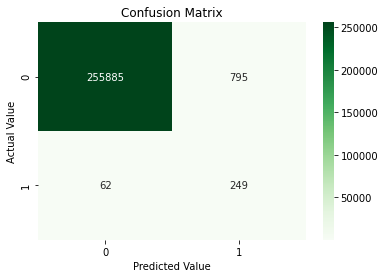

In [88]:
#visulizaing the confusion matrix using a heatmap

classes = ['Non-Default: 0', 'Default: 1']
fig, ax = plt.subplots()
ticks = np.arange(len(classes))
plt.xticks(ticks, classes)
plt.yticks(ticks, classes)

#plot a heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="Greens", fmt='g')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')

In [89]:
#Evaluation of the model using metrics 

print("Accuracy",metrics.accuracy_score(Y_test, Y_pred))
print("Precision",metrics.precision_score(Y_test, Y_pred))
print("Recall",metrics.recall_score(Y_test, Y_pred))

Accuracy 0.9966652528687775
Precision 0.23850574712643677
Recall 0.8006430868167203


In [90]:
#plot the ROC curve 
#import the necessary libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

0.9408078897141687


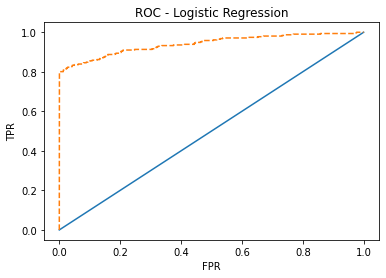

In [92]:
#plot the ROC curve
Y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, threshold1 = roc_curve(Y_test, Y_pred_prob)
plt.plot([0,1], [0,1])
plt.plot(fpr, tpr, linestyle = '--', label = 'Logistic Regression')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC - Logistic Regression')
#print the auc score
auc_score = roc_auc_score(Y_test, Y_pred_prob)
print(auc_score)

# K-fold Cross Validation

In [93]:
#perform K-fold cross validation technique evaluate the model and calculate the scores
#using 5 data points and also calculate the mean and std of the model
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression()
scores = cross_val_score(logreg, X_train, Y_train, cv=5, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

c:\users\caroline sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\caroline sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver opt

Scores: [0.98073975 0.99106404 0.99103238 0.99084245 0.98658695]
Mean: 0.9880531152286259
Standard Deviation: 0.00403378340521156


c:\users\caroline sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# 2. Decision Tree

In [94]:
#import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
# build and fit the model
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
dectree = dectree.fit(X_train,Y_train)

In [95]:
#predict the values
Y_pred = dectree.predict(X_test)

In [96]:
Y_pred

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

# Model Evaluation

In [97]:
#Evaluating the model using Confusion matrix

confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
confusion_matrix

array([[148769, 107911],
       [    15,    296]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

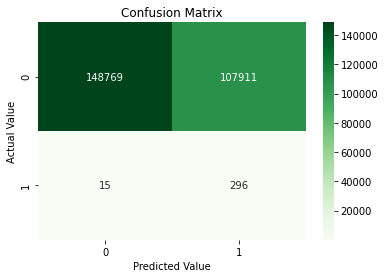

In [98]:
#visulizaing the confusion matrix using a heatmap

classes = ['Non-Default: 0', 'Default: 1']
fig, ax = plt.subplots()
ticks = np.arange(len(classes))
plt.xticks(ticks, classes)
plt.yticks(ticks, classes)

#plot a heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="Greens", fmt='g')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')

In [99]:
#Evaluation of the model using metrics 

print("Accuracy",metrics.accuracy_score(Y_test, Y_pred))
print("Precision",metrics.precision_score(Y_test, Y_pred))
print("Recall",metrics.recall_score(Y_test, Y_pred))

Accuracy 0.5800397679296162
Precision 0.0027354977034757455
Recall 0.9517684887459807


0.7656789303633286


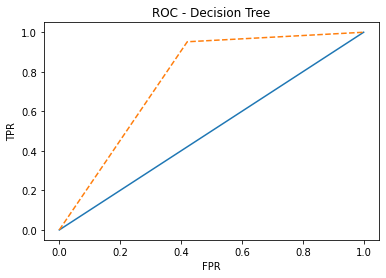

In [100]:
#plot the roc curve
Y_pred_prob = dectree.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(Y_test, Y_pred_prob)
plt.plot([0,1], [0,1])
plt.plot(fpr, tpr, linestyle = '--', label = 'Decision Tree')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC - Decision Tree')
#print the auc score
auc_score = roc_auc_score(Y_test, Y_pred_prob)
print(auc_score)

# 3. Naive Bayes

In [101]:
#3. Naive Bayes
#import the relevant modules
from sklearn.naive_bayes import GaussianNB

In [102]:
#build the model
naivebay = GaussianNB()

#fit the model
naivebay = naivebay.fit(X_train, Y_train)

In [103]:
#predict using test data

Y_pred = naivebay.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Model Evaluation

In [104]:
#Evaluating the model using Confusion matrix

confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
confusion_matrix

array([[256103,    577],
       [   233,     78]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

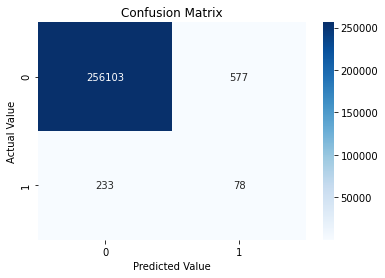

In [105]:
#visulizaing the confusion matrix using a heatmap

classes = ['Non-Default: 0', 'Default: 1']
fig, ax = plt.subplots()
ticks = np.arange(len(classes))
plt.xticks(ticks, classes)
plt.yticks(ticks, classes)

#plot a heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')

In [106]:
#Evaluating the model using the metrics

print("Accuracy",metrics.accuracy_score(Y_test, Y_pred))
print("Precision",metrics.precision_score(Y_test, Y_pred))
print("Recall",metrics.recall_score(Y_test, Y_pred))

Accuracy 0.9968481386507698
Precision 0.11908396946564885
Recall 0.2508038585209003


0.8618735678490664


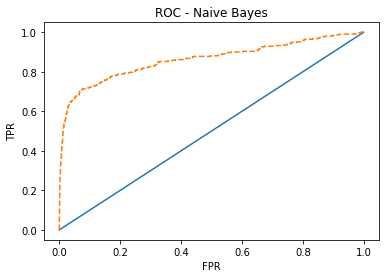

In [108]:
#plot the roc curve
Y_pred_prob = naivebay.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(Y_test, Y_pred_prob)
plt.plot([0,1], [0,1])
plt.plot(fpr, tpr, linestyle = '--', label = 'Naive Bayes')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC - Naive Bayes')
#print the auc score
auc_score = roc_auc_score(Y_test, Y_pred_prob)
print(auc_score)

# 4. ANN (Artificial Neural Network)

In [109]:
#ANN model using keras
#import the libraries
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

In [110]:
# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [111]:
#build the ANN model
model = Sequential()

#add an input layer and hidden layer
model.add(Dense(units = 20, activation = 'relu'))
#add the next hidden layer
model.add(Dense(units = 15, activation = 'relu'))

#add the last dense layer
model.add(Dense(units = 10, activation = 'relu'))

#now that there are 3 hidden layers we can add the output layer
model.add(Dense(units = 1, activation = 'sigmoid'))



In [112]:
#compile the model

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#fit the model
              
model.fit(X_train, Y_train, batch_size = 32, epochs = 10)


Epoch 1/10
34552/34552 [==============================] - 33s 945us/step - loss: 0.0434 - accuracy: 0.9878
Epoch 2/10
34552/34552 [==============================] - 32s 929us/step - loss: 0.0330 - accuracy: 0.9913
Epoch 3/10
34552/34552 [==============================] - 32s 931us/step - loss: 0.0307 - accuracy: 0.9919
Epoch 4/10
34552/34552 [==============================] - 32s 917us/step - loss: 0.0292 - accuracy: 0.9923
Epoch 5/10
34552/34552 [==============================] - 31s 900us/step - loss: 0.0284 - accuracy: 0.9926
Epoch 6/10
34552/34552 [==============================] - 31s 911us/step - loss: 0.0276 - accuracy: 0.9928
Epoch 7/10
34552/34552 [==============================] - 31s 906us/step - loss: 0.0270 - accuracy: 0.9930
Epoch 8/10
34552/34552 [==============================] - 31s 901us/step - loss: 0.0265 - accuracy: 0.9931
Epoch 9/10
34552/34552 [==============================] - 31s 898us/step - loss: 0.0261 - accuracy: 0.9932
Epoch 10/10
34552/34552 [============

In [113]:
#predict the test results 
Y_pred = model.predict(X_test)

In [114]:
Y_pred

array([[0.00237632],
       [0.01042226],
       [0.29914916],
       ...,
       [1.        ],
       [1.        ],
       [1.        ]], dtype=float32)

In [115]:
#to check the accuarcy
#comparing y_pred and y_test
Y_pred = (Y_pred >0.5)
Y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

# Model Evaluation

In [116]:
#Evaluate the model by calculating the score

Score = model.evaluate(X_test, Y_test)
print(Score)

8031/8031 [==============================] - 6s 748us/step - loss: 12.3090 - accuracy: 0.3484
[12.30898666381836, 0.3484013080596924]


In [117]:
#Evaluating the model using Confusion matrix

confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
confusion_matrix

array([[ 89231, 167449],
       [     6,    305]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

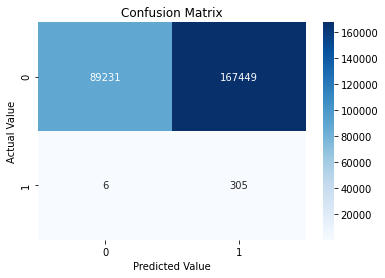

In [118]:
#visulizaing the confusion matrix using a heatmap

classes = ['Non-Default: 0', 'Default: 1']
fig, ax = plt.subplots()
ticks = np.arange(len(classes))
plt.xticks(ticks, classes)
plt.yticks(ticks, classes)

#plot a heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')

In [119]:
#Evaluating the model using the metrics

print("Precision",metrics.precision_score(Y_test, Y_pred))
print("Recall",metrics.recall_score(Y_test, Y_pred))

Precision 0.0018181384646565805
Recall 0.9807073954983923


In [120]:
#calculate the f1 score
from sklearn.metrics import f1_score
f1_score(Y_test, Y_pred)

0.0036295480915122125